In [ ]:
!pip install notebook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.6 MB/s eta 0:00:00


In [ ]:
!pip install jupyter_http_over_ws

SyntaxError: invalid syntax (<ipython-input-4-3474779096>, line 1)

In [ ]:
!pip install pymssql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 41.7 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import pymssql

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

In [ ]:
host = "45.117.83.230"
port = "1433"
user = "Student_DA_Q1"
password = "@MindXDream2023"
database = "DA_FINAL_TEST"

connection = pymssql.connect(host = host, port = port, user = user, password = password, database = database)

query = "SELECT * FROM [dbo].[Customer_Churn_Banker]"

df = pd.read_sql(query, connection)
df

<ipython-input-32-2966462306>:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  object 
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [ ]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,199992.480000,1.000000


In [ ]:
df.isna().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [ ]:
df['churn'].value_counts()

,count
churn,
0,7963
1,2037


In [ ]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,199992.480000,1.000000


In [ ]:
df.to_csv('data.csv', index=False)

In [ ]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<Axes: xlabel='churn', ylabel='count'>

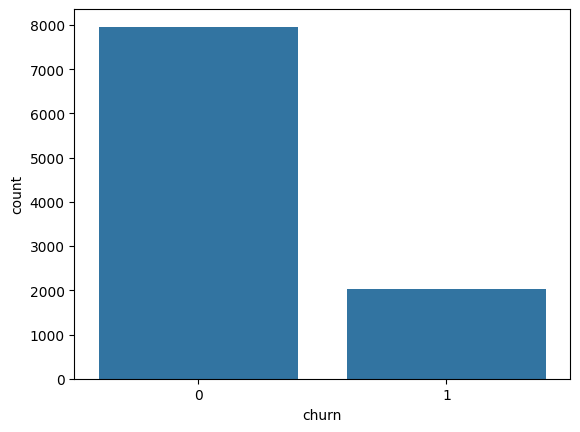

In [ ]:
sns.countplot(x = 'churn', data = df)

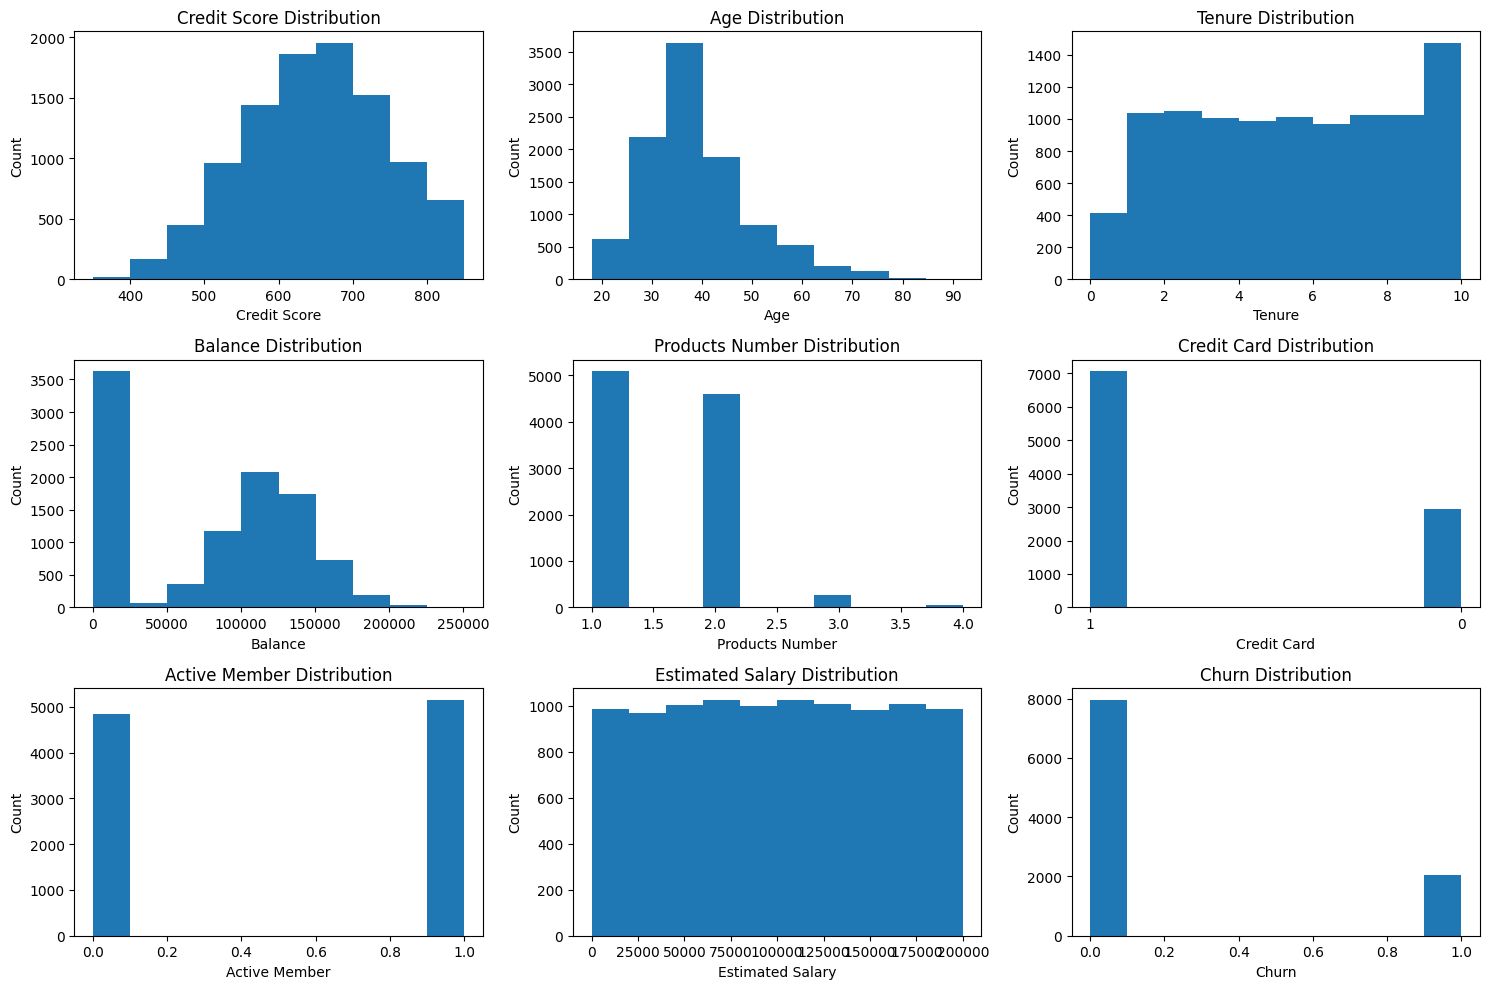

In [ ]:
credit_score = 'credit_score'
age = 'age'
tenure = 'tenure'
balance = 'balance'
products_number = 'products_number'
credit_card = 'credit_card'
active_member = 'active_member'
estimated_salary = 'estimated_salary'
churn = 'churn'

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# First row
axes[0, 0].hist(df[credit_score], bins=10)
axes[0, 0].set_xlabel('Credit Score')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Credit Score Distribution')

axes[0, 1].hist(df[age], bins=10)
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Age Distribution')

axes[0, 2].hist(df[tenure], bins=10)
axes[0, 2].set_xlabel('Tenure')
axes[0, 2].set_ylabel('Count')
axes[0, 2].set_title('Tenure Distribution')

# Second row
axes[1, 0].hist(df[balance], bins=10)
axes[1, 0].set_xlabel('Balance')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Balance Distribution')

axes[1, 1].hist(df[products_number], bins=10)
axes[1, 1].set_xlabel('Products Number')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Products Number Distribution')

axes[1, 2].hist(df[credit_card], bins=10)
axes[1, 2].set_xlabel('Credit Card')
axes[1, 2].set_ylabel('Count')
axes[1, 2].set_title('Credit Card Distribution')

# Third row
axes[2, 0].hist(df[active_member], bins=10)
axes[2, 0].set_xlabel('Active Member')
axes[2, 0].set_ylabel('Count')
axes[2, 0].set_title('Active Member Distribution')

axes[2, 1].hist(df[estimated_salary], bins=10)
axes[2, 1].set_xlabel('Estimated Salary')
axes[2, 1].set_ylabel('Count')
axes[2, 1].set_title('Estimated Salary Distribution')

axes[2, 2].hist(df[churn], bins=10)
axes[2, 2].set_xlabel('Churn')
axes[2, 2].set_ylabel('Count')
axes[2, 2].set_title('Churn Distribution')

plt.tight_layout()
plt.show()

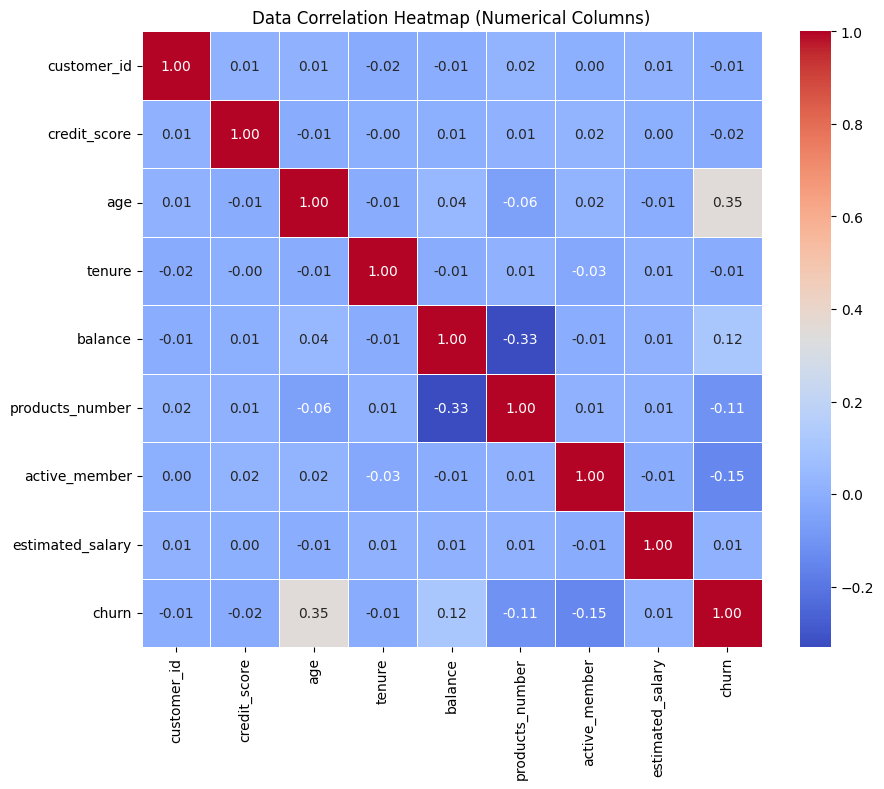

In [ ]:
# Calculate the correlation matrix for numerical columns only
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Data Correlation Heatmap (Numerical Columns)")
plt.show()

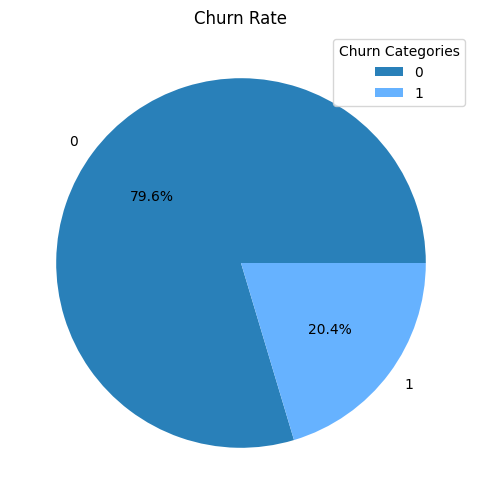

In [ ]:
churn_rate = df["churn"].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(churn_rate, labels=churn_rate.index, autopct='%1.1f%%', colors=['#2980B9', '#66B2FF'])
plt.legend(title="Churn Categories", loc="upper right")
plt.title("Churn Rate")
plt.show()

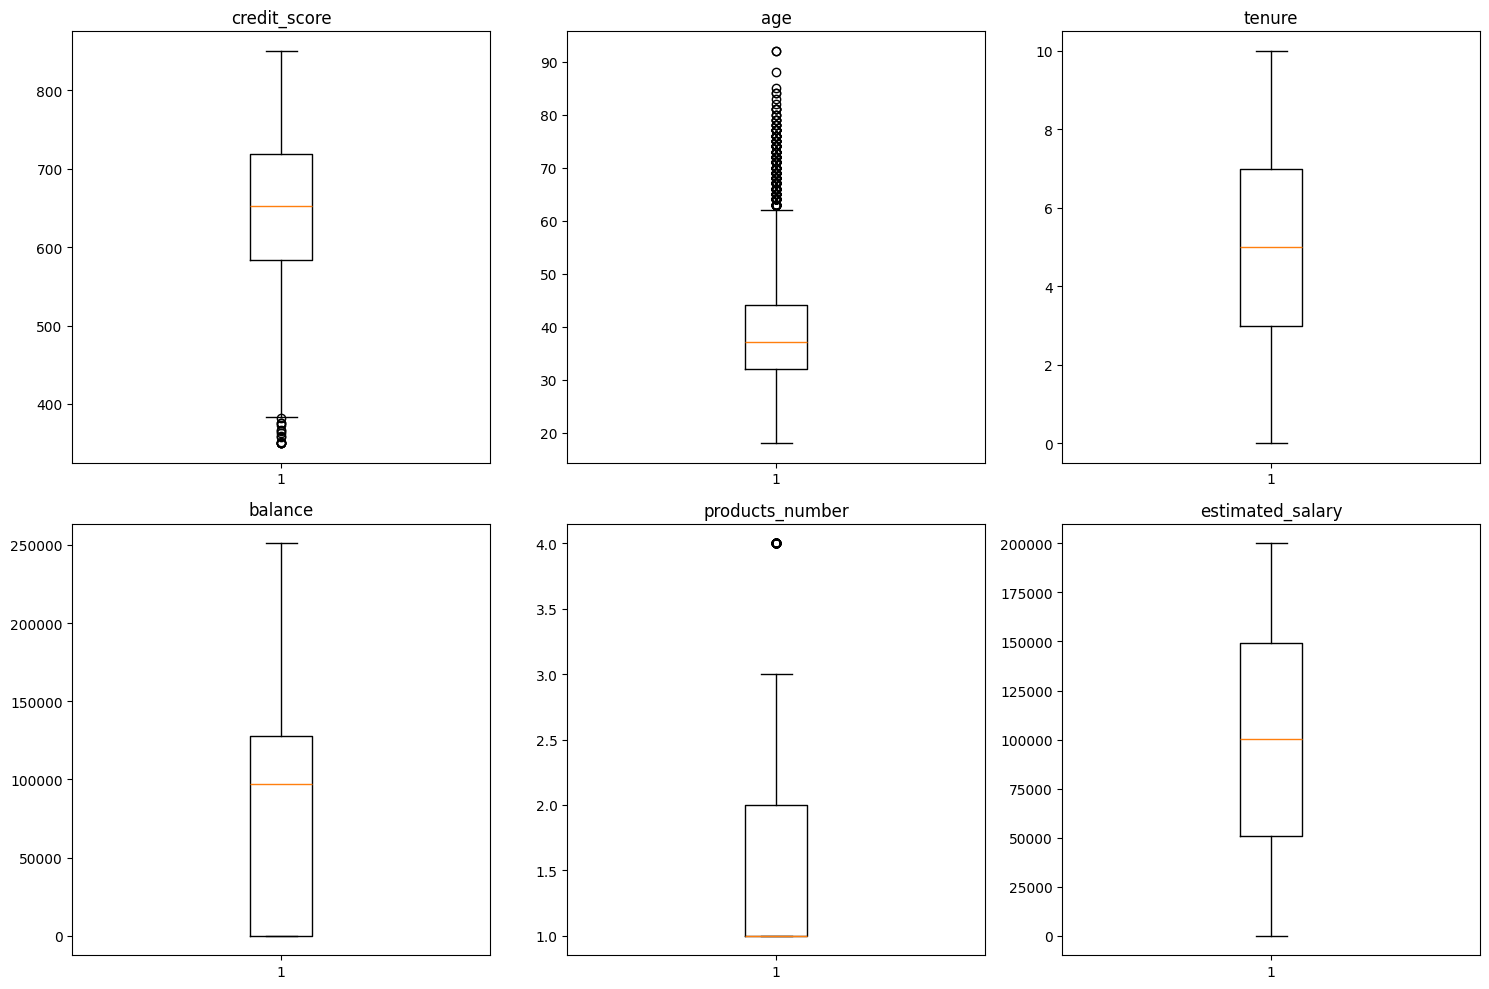

In [ ]:
numerical_columns = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, column in enumerate(numerical_columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.boxplot(df[column].dropna())
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [ ]:
df['age'].value_counts()

,count
age,
37,478
38,477
35,474
36,456
34,447
...,...
84,2
82,1
88,1


In [ ]:
df['credit_score'].value_counts()

,count
credit_score,
850,233
678,63
655,54
705,53
667,53
...,...
358,1
412,1
382,1


In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

df = remove_outliers(df, 'credit_score')
df = remove_outliers(df, 'age')
df = remove_outliers(df, 'products_number')

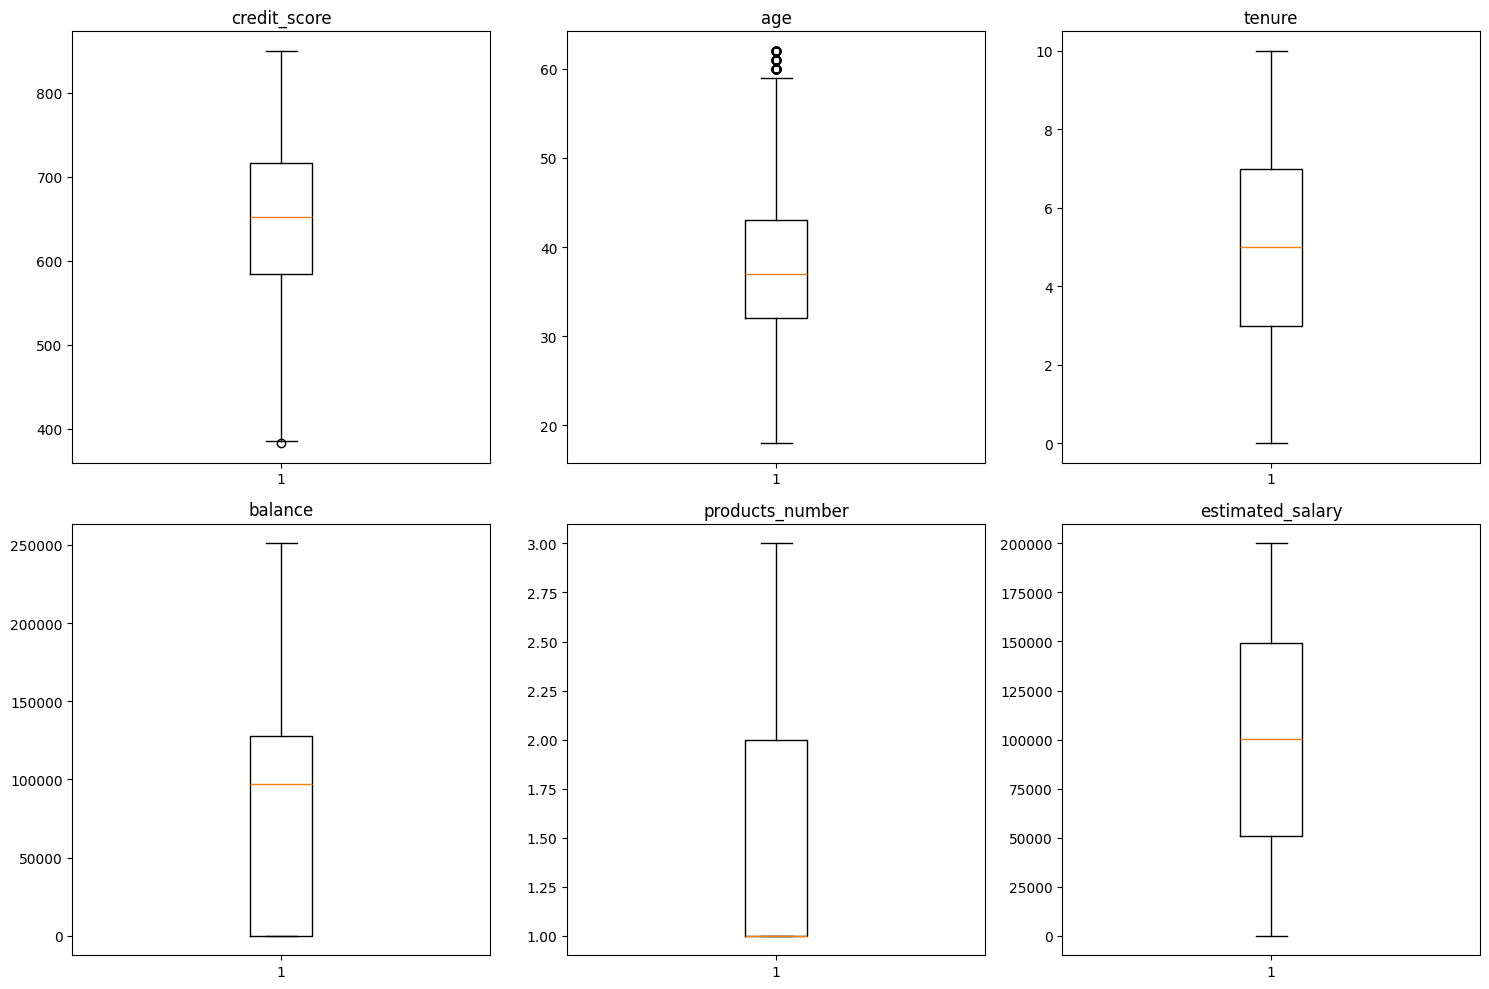

In [ ]:
numerical_columns = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, column in enumerate(numerical_columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.boxplot(df[column].dropna())
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [ ]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.to_csv('data.csv', index=False)

DATA ENCODING & VARIABLE DECLARATION

In [ ]:
churn_percentage = (df["churn"].sum() / df.shape[0]) * 100
print("Percentage of customers who churned:", churn_percentage)

Percentage of customers who churned: 19.763795986622075


In [ ]:
data_encoded = pd.get_dummies(df)

X = data_encoded.drop("churn", axis=1)
y = data_encoded["churn"]

In [ ]:
features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']
target = 'churn'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

LOGISTICS REGRESSION

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.8087774294670846
Confusion Matrix:
[[1506   18]
 [ 348   42]]


In [ ]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1524
           1       0.70      0.11      0.19       390

    accuracy                           0.81      1914
   macro avg       0.76      0.55      0.54      1914
weighted avg       0.79      0.81      0.75      1914



DECISION TREE

In [ ]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1524
           1       0.46      0.45      0.45       390

    accuracy                           0.78      1914
   macro avg       0.66      0.66      0.66      1914
weighted avg       0.78      0.78      0.78      1914



RANDOM FOREST

In [ ]:
model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1524
           1       0.77      0.43      0.55       390

    accuracy                           0.86      1914
   macro avg       0.82      0.70      0.73      1914
weighted avg       0.85      0.86      0.84      1914



TENSORFLOW

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

predictions = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6642 - loss: 674.3353
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6763 - loss: 136.9713
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6907 - loss: 135.9416
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6855 - loss: 128.3324
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6806 - loss: 84.0434
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6984 - loss: 98.9296
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6883 - loss: 81.7942
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6959 - loss: 106.2781
Epoch 9/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6888 - loss: 62.5427
Epoch 10/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6840 - loss: 75.6677
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7943 - loss: 152.1562
Test Loss: 146.94334411621094, Test Accuracy: 0.7

GRADIENT BOOSTING

In [ ]:
model = GradientBoostingClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1524
           1       0.78      0.44      0.56       390

    accuracy                           0.86      1914
   macro avg       0.82      0.70      0.74      1914
weighted avg       0.85      0.86      0.84      1914



ADABOOST

In [ ]:
model = AdaBoostClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the churn labels for the test data
y_pred = model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1524
           1       0.63      0.49      0.56       390

    accuracy                           0.84      1914
   macro avg       0.76      0.71      0.73      1914
weighted avg       0.83      0.84      0.83      1914



XG BOOST

In [ ]:
model = XGBClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:credit_card: object